In [1]:
from IPython.display import Image

# Introduction to ML using Text Classication

Here’s a high-level overview of the workflow used to solve machine learning problems:

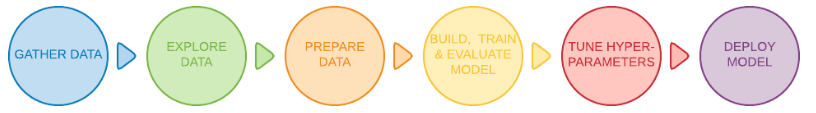

In [2]:
Image(filename='ML_steps.png')

# and Supervised Learning

    1.Learning from training data is called Supervided Learning. 
        a. Input: Training data
        b. Output: Prediction function that produces output Y given input X

In [3]:
import os
import _pickle as cPickle

import numpy as np
import matplotlib.pyplot as plt

from collections             import Counter

from sklearn.metrics         import accuracy_score
from sklearn.naive_bayes     import MultinomialNB
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer

# Spam Problem

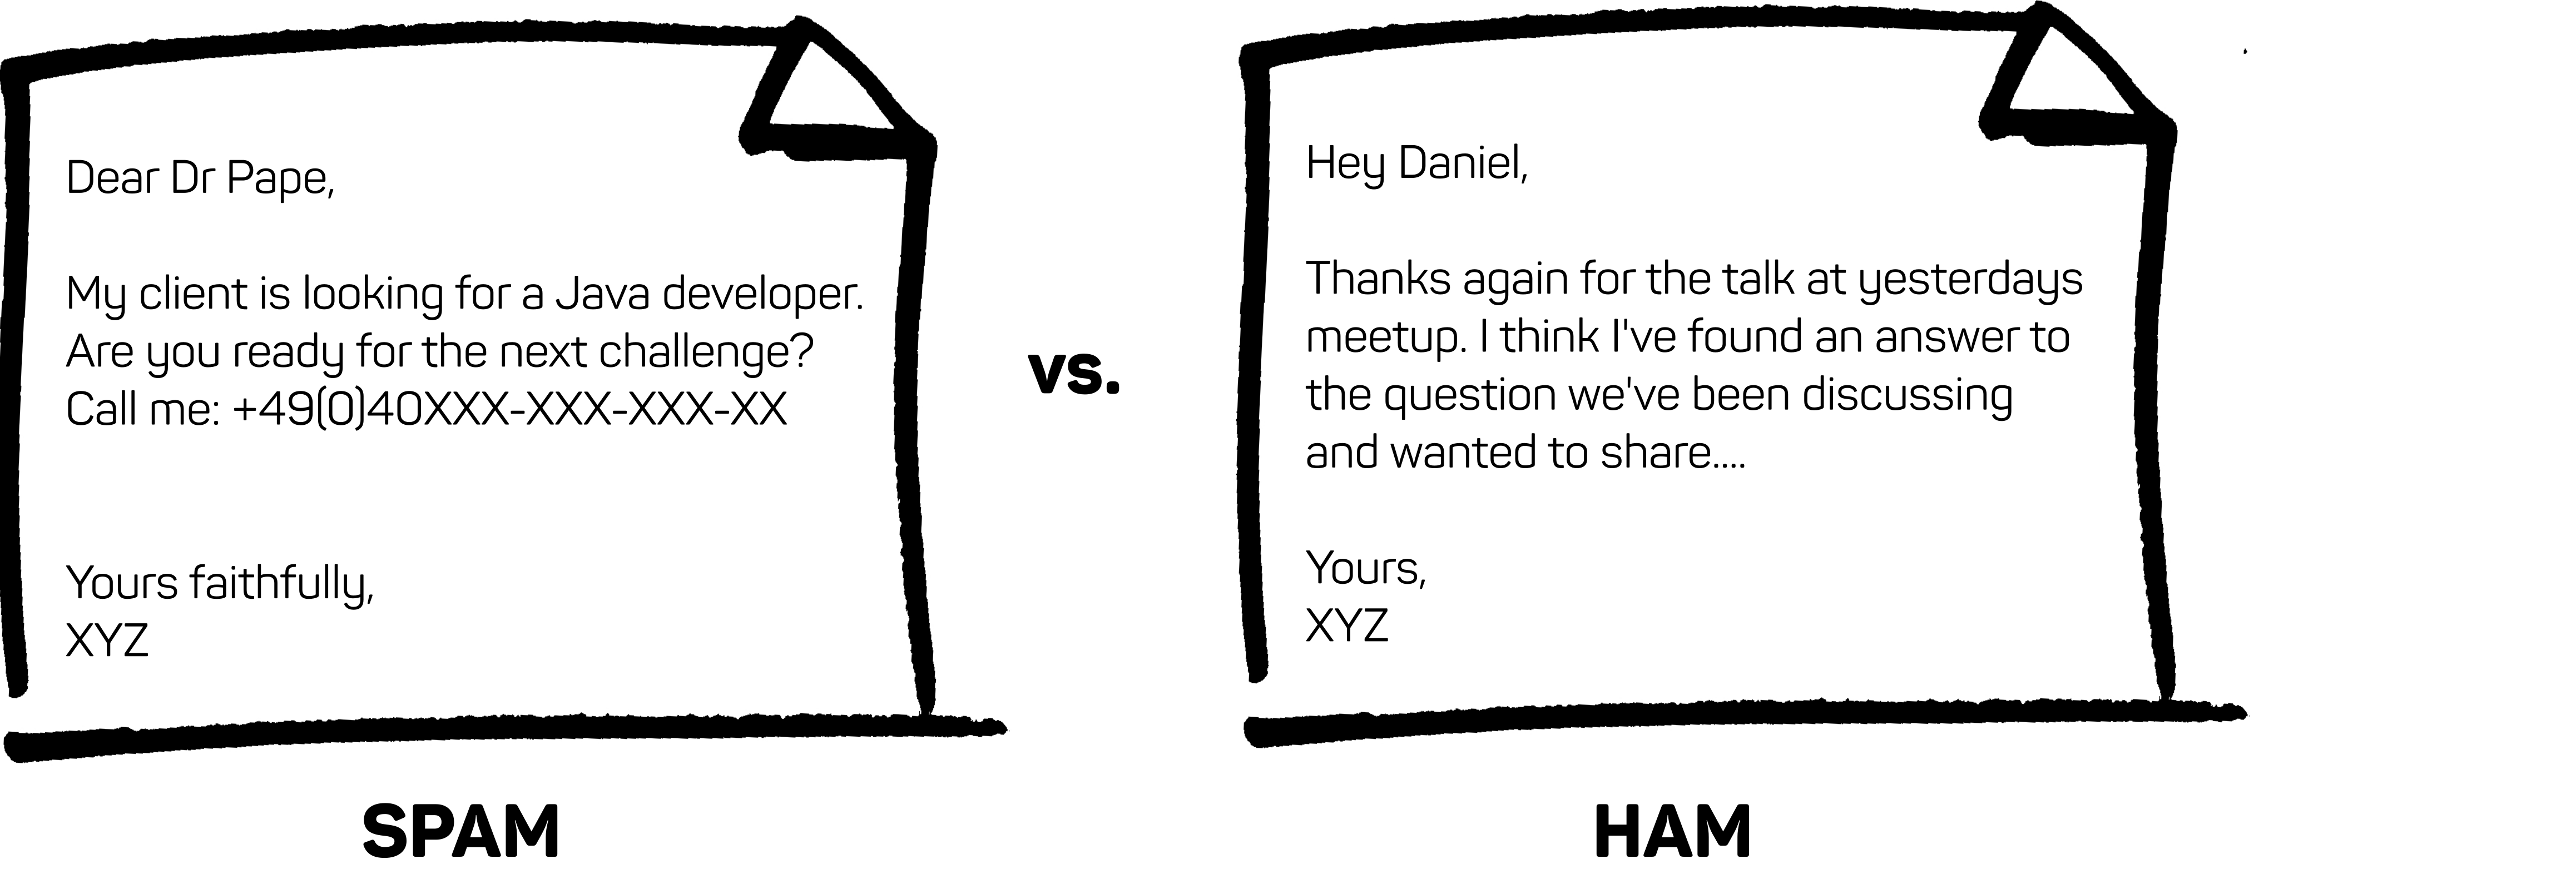

In [4]:
Image(filename='ham-vs-spam.png')

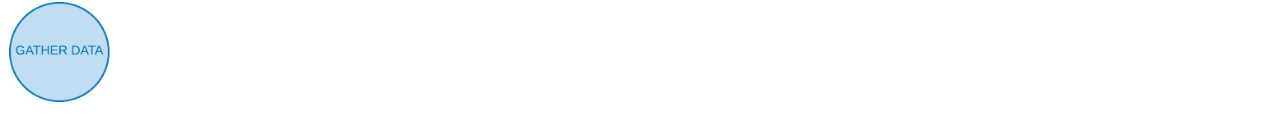

In [5]:
direc = "dataset/"
files = os.listdir(direc)
texts = [direc + file for file in files]

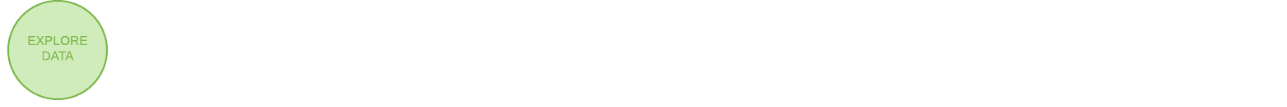

# Data example

In [6]:
texts[1:10]

['dataset/0002.1999-12-13.farmer.ham.txt',
 'dataset/0003.1999-12-14.farmer.ham.txt',
 'dataset/0004.1999-12-14.farmer.ham.txt',
 'dataset/0005.1999-12-14.farmer.ham.txt',
 'dataset/0006.2003-12-18.GP.spam.txt',
 'dataset/0007.1999-12-14.farmer.ham.txt',
 'dataset/0008.2003-12-18.GP.spam.txt',
 'dataset/0009.1999-12-14.farmer.ham.txt',
 'dataset/0010.1999-12-14.farmer.ham.txt']

# One not-spam email example from the raw data

In [7]:
file = open(texts[5])
text = file.read().replace('\n',' ')

text

'Subject: dobmeos with hgh my energy level has gone up ! stukm introducing doctor - formulated hgh human growth hormone - also called hgh is referred to in medical science as the master hormone . it is very plentiful when we are young , but near the age of twenty - one our bodies begin to produce less of it . by the time we are forty nearly everyone is deficient in hgh , and at eighty our production has normally diminished at least 90 - 95 % . advantages of hgh : - increased muscle strength - loss in body fat - increased bone density - lower blood pressure - quickens wound healing - reduces cellulite - improved vision - wrinkle disappearance - increased skin thickness texture - increased energy levels - improved sleep and emotional stability - improved memory and mental alertness - increased sexual potency - resistance to common illness - strengthened heart muscle - controlled cholesterol - controlled mood swings - new hair growth and color restore read more at this website unsubscribe

# Collecting Key Metrics

1. Number of samples: Total number of examples you have in the data.
2. Number of classes: Total number of topics or categories in the data.
3. Frequency distribution of words: Distribution showing the frequency (number of occurrences) of each word in the dataset
4. Distribution of sample length: Distribution showing the number of words per sample in the dataset

In [8]:
print('1. Number of samples: {}'.format(len(texts)))
print('2. Number of classes: 2')

1. Number of samples: 5173
2. Number of classes: 2


In [9]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    
    plt.figure(figsize=(20,10))
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    
def load_text(dataset):

    def read_file(file):
        try:
            f = open(file)
            load = f.read()

            if load != None:
                return load
            else: return None
            
        except: return None
        # or print('encoding error type detected in the: {}'.format(file))
        
    loads = []
    for file in texts: 
        f = read_file(file)

        if f == None: pass
        else: loads.append(f)
            
    return loads

# 3. Frequency distribution of words

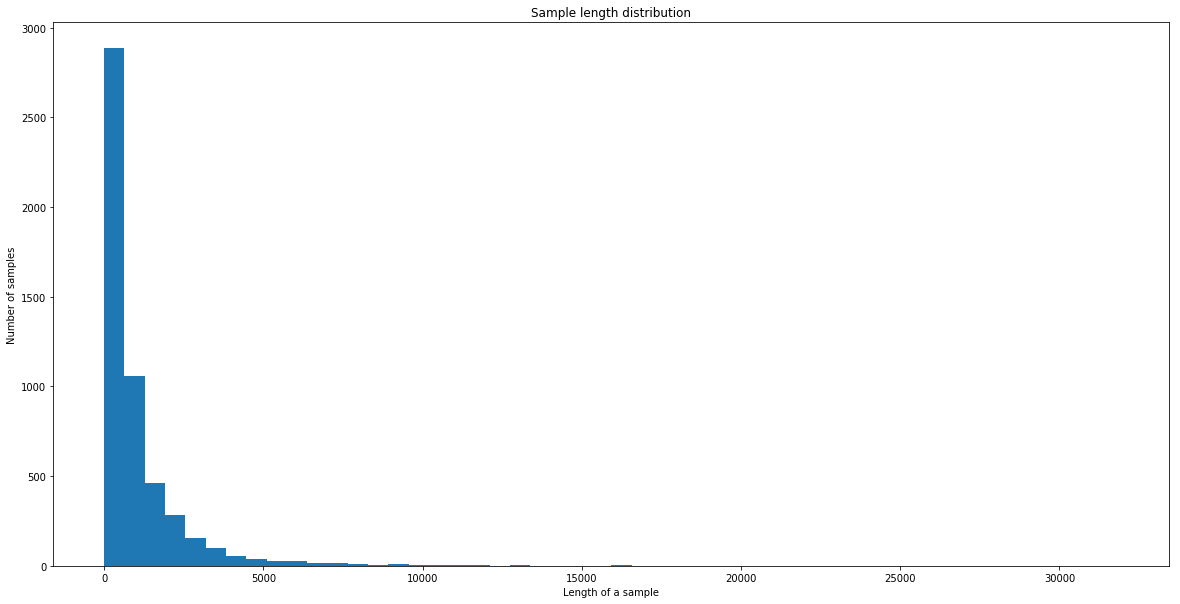

In [10]:
plot_sample_length_distribution(load_text(texts))

In [11]:
def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.figure(figsize=(20,10))
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    
    plt.show()

# 4. Frequency distribution of word

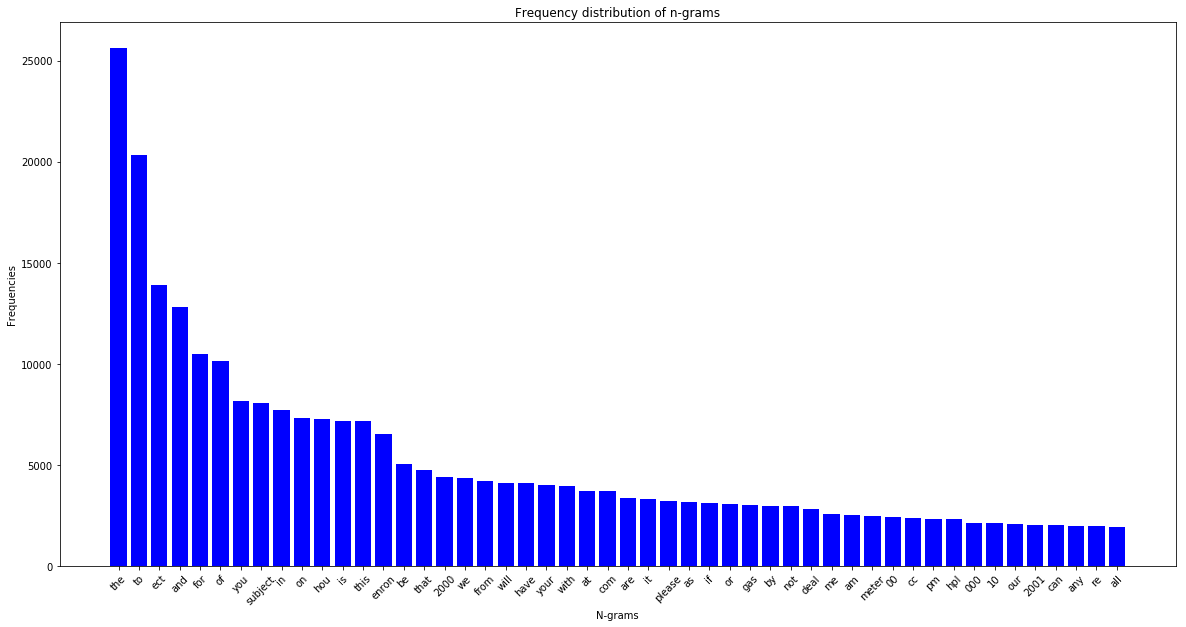

In [12]:
plot_frequency_distribution_of_ngrams(load_text(texts))

# Preprocessing and Vectorization
1. How do we present the text data to an algorithm that expects numeric input?

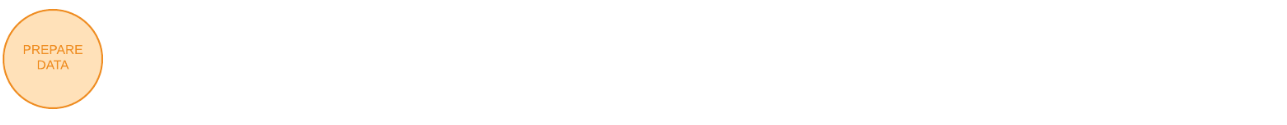

# 1. Feature engineering

    a. Transformation of raw data into features suitable for modeling. Which means: transform texts into numeric input.

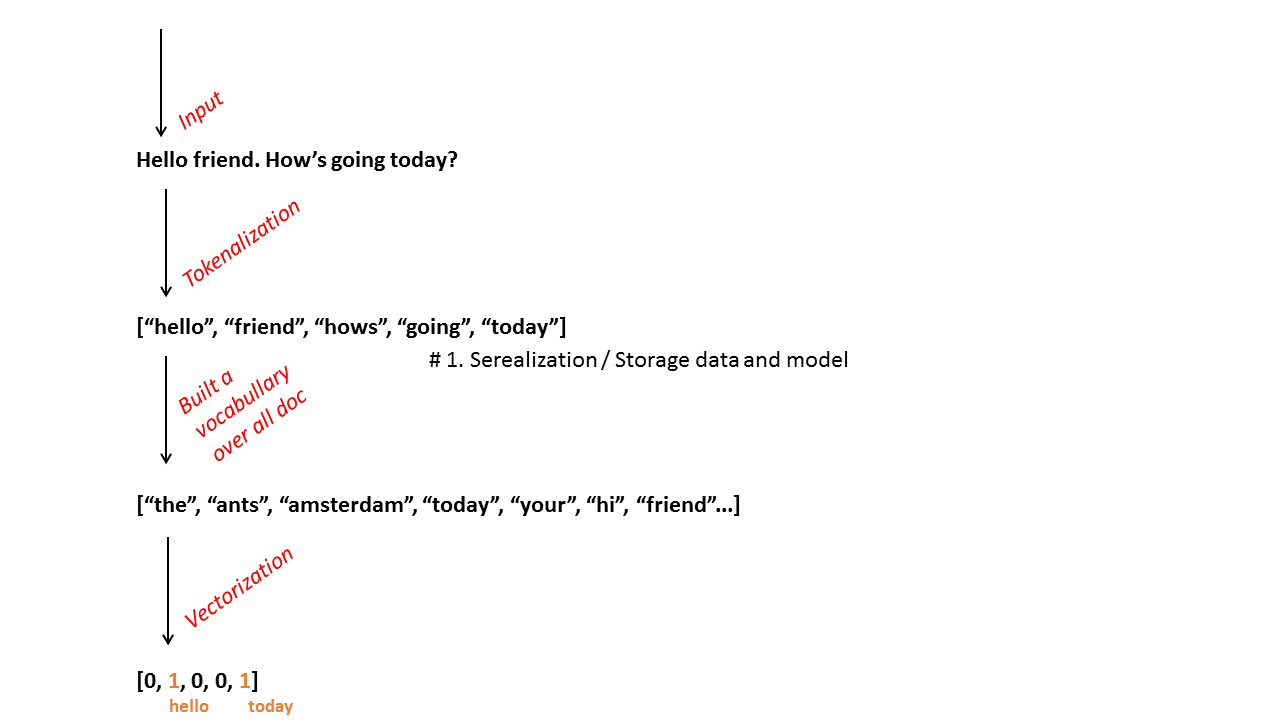

In [13]:
Image(filename='feature_engineering.png')

In [14]:
ngrams   = []

for file in texts:
    
    f = open(file)
    
    try:
        data = f.read()
    except: pass
    
    ngrams += data.split(" ")

In [15]:
'''
vector = Counter(ngrams)
vector.most_common(3000)
'''

'\nvector = Counter(ngrams)\nvector.most_common(3000)\n'

# Delete non alphabetic records

In [16]:
for word in range(len(ngrams)):
    if not ngrams[word].isalpha():
        ngrams[word] = ""
vector = Counter(ngrams)
del vector[""]

# The top 10 commom words 

In [17]:
vector.most_common(3000)[0:10]

[('the', 21967),
 ('to', 16094),
 ('ect', 11643),
 ('and', 11323),
 ('for', 9434),
 ('of', 9361),
 ('a', 8809),
 ('you', 7284),
 ('hou', 7283),
 ('in', 6870)]

In [18]:
def vectors():
    
    direc = "dataset/"
    files = os.listdir(direc)
    texts = [direc + file for file in files]

    ngrams   = []
    
    for file in texts:

        f = open(file)

        try:
            data = f.read()
        except: continue

        ngrams += data.split(" ")
    
    for word in range(len(ngrams)):
        if not ngrams[word].isalpha():
            ngrams[word] = ""
        
    vector = Counter(ngrams)
    del vector[""]

    return vector.most_common(3000)

In [19]:
def vectorize(vectors):
    
    direc = "dataset/"
    files = os.listdir(direc)
    texts = [direc + file for file in files]
    
    labels = []
    feature_set = []

    for file in texts:
        
        data = []
        
        try:
            f = open(file)
            words = f.read().split(' ')
        except: continue
   
        for row in vectors:
            data.append(words.count(row[0]))
        feature_set.append(data)

        if "ham" in file:
            labels.append(0)
        if "spam" in file:
            labels.append(1)

    return feature_set, labels

2. What type of model should we use?
3. What configuration parameters should we use for our model?

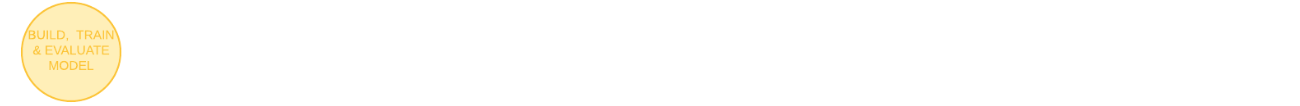

# 2. Naive Bayes: supervised classification algorithm & applications

    1. Naive Bayes is a ML algotithm for classification problems. It's primarily used for text classification, which involves hig-dimensinal training data sets. A few exaple of applications:

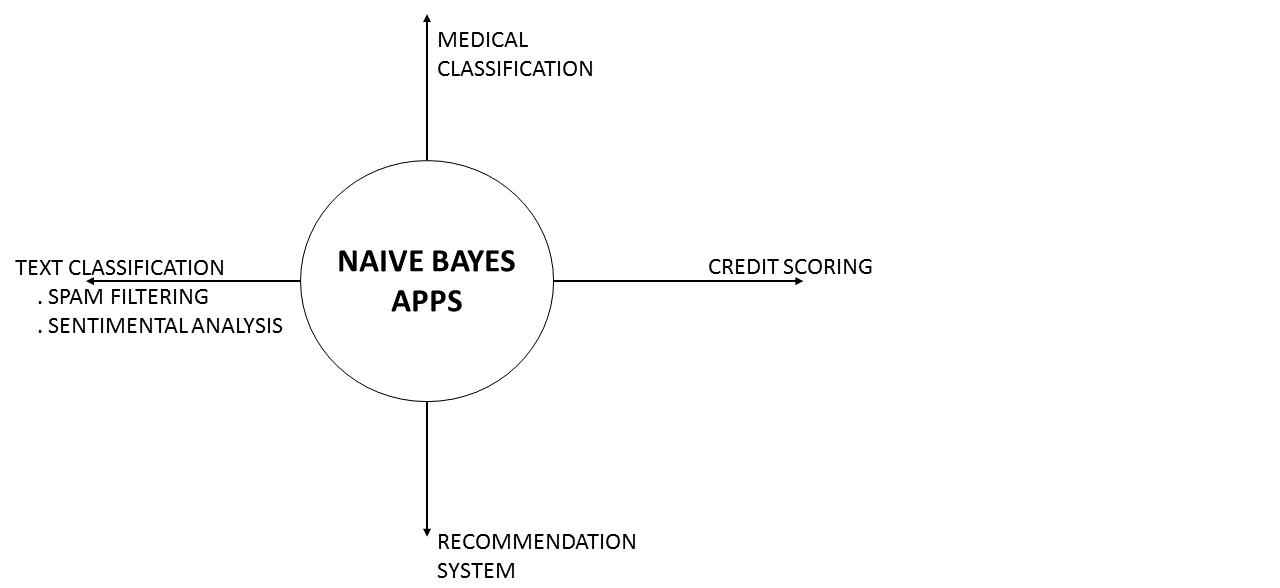

In [20]:
Image(filename='naive.png')

2. It is a probabilistic classifier that learns the probability of an object with certain features belonging to a 
    particular group in class. 
    
    
3. The bases of the Naive Bayes algorithm is the basis of the Bayse Theorm. It gives a method to calculate the probability that is: the conditional propability of an event based on the previous knowledge available on the events

## 3. What configuration parameters should we use for the model?

# Workflow (review)

## 1. Get data

In [21]:
data = vectors()

## 2. Prepare data (Feature extraction)

In [22]:
features, labels = vectorize(data)

## 3. Built, Train, and Evaluate the Model 

* Splitting lebeled data into training and test sets

In [23]:
feature_train, feature_test, labels_train, labels_test = tts(features[:-1], labels, test_size=0.2)

 * Choosing the ML algorithm - Naive Bayes

In [24]:
classifier = MultinomialNB()

* Training the ML model

In [25]:
classifier.fit(feature_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

* Evaluating the predction function on a test set

In [26]:
preds = classifier.predict(feature_test)
print ('The ML model accuracy score is: {}'.format(accuracy_score(labels_test, preds)))

The ML model accuracy score is: 0.9342359767891683


In [27]:
def main():

    data = vectors()
    
    # Feature extraction
    features, labels = vectorize(data)

    # Splitting lebeled data into training and test sets
    feature_train, feature_test, labels_train, labels_test = tts(features[:-1], labels, test_size=0.2)
    
    # Choosing the ML algorithm - Naive Bayes
    classifier = MultinomialNB()
    
    # Training the ML model
    classifier.fit(feature_train, labels_train)
    
    # Evaluating the predction function on a test set
    preds = classifier.predict(feature_test)
    print ('The ML model accuracy score is: {}'.format(accuracy_score(labels_test, preds)))
    
    # Serialization: Storing data / putting the classifier in production 
    save(classifier, "text_classifier.mdl")

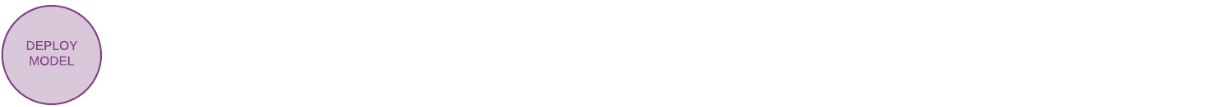

    1. Deploy your model
    2. Detecte if it is spam or not spam

# 1. Deploy your model: Storage in memory data and model

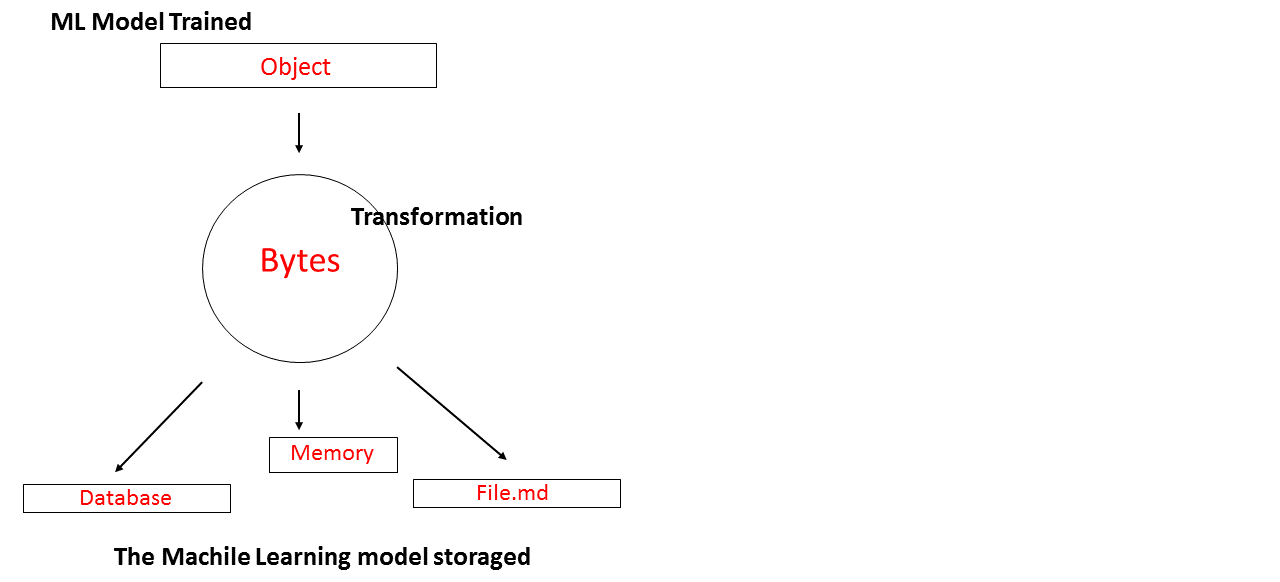

In [28]:
Image(filename='Serialization.png')

In [29]:
def save(classifier, name):
    with open(name, 'wb') as fp:
        cPickle.dump(classifier, fp)
    print ("The classifer is saved!")
    
def load(classifier):
    
    with open(classifier, 'rb') as fp:
        classifier = cPickle.load(fp)
    return classifier

In [30]:
if __name__ == "__main__":
    main()

The ML model accuracy score is: 0.9400386847195358
The classifer is saved!


# 2. Solution: Detect if it is spam or not spam

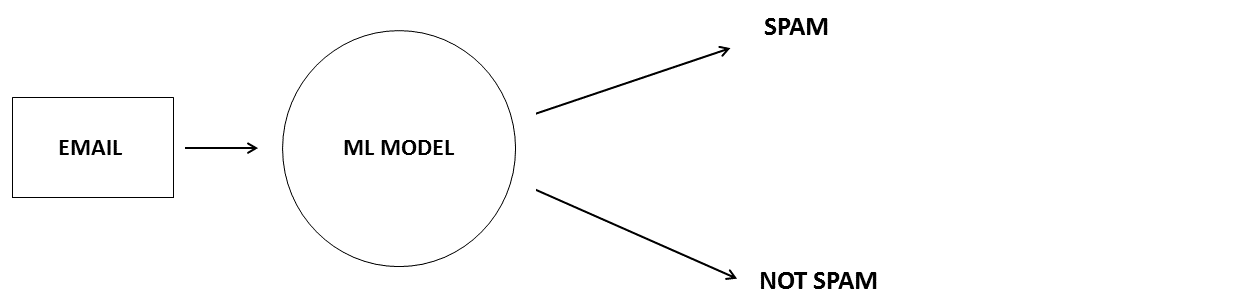

In [31]:
Image(filename='detector.png') 

In [32]:
def detector():
    
    vector     = vectors()
    classifier = load("text_classifier.mdl")

    while True:

        features = []

        inp = input(">").split()

        if inp[0].lower().strip() == "exit": break

        for word in vector:
            features.append(inp.count(word[0]))

        preds = classifier.predict([features])
        
        print('-------------------')
        print (["NOT SPAM!", "SPAM!"][preds[0]])

In [33]:
#detector()